# Data exploaration and mapping

In [ ]:
# Distribution of magnitude, latitude, longitude and depth 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/simon/OneDrive/Skrivbord/Thesis/Significant_Earthquakes.csv'
earthquake_data = pd.read_csv(file_path)

# Define relevant columns for analysis
relevant_columns = ['latitude', 'longitude', 'depth', 'mag', 'time']

# Retain Relevant Columns
earthquake_data = earthquake_data[relevant_columns]

# Replace missing values with 0
earthquake_data.fillna(0, inplace=True)

# Feature Engineering: Extract temporal features from 'time' column
earthquake_data['year'] = pd.to_datetime(earthquake_data['time']).dt.year
earthquake_data['month'] = pd.to_datetime(earthquake_data['time']).dt.month

# Drop the 'time' column after feature engineering
earthquake_data.drop('time', axis=1, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
sns.histplot(data=earthquake_data, x='mag', bins=10, kde=True)
plt.title('Distribution of Magnitude')

plt.subplot(1, 4, 2)
sns.histplot(data=earthquake_data, x='depth', bins=10, kde=True)
plt.title('Distribution of Depth')

plt.subplot(1, 4, 3)
sns.histplot(data=earthquake_data, x='latitude', bins=10, kde=True)
plt.title('Distribution of Latitude')

plt.subplot(1, 4, 4)
sns.histplot(data=earthquake_data, x='longitude', bins=10, kde=True)
plt.title('Distribution of Longitude')

plt.tight_layout()
plt.show()


In [ ]:
# Magnitude distribution 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6)) 
sns.histplot(earthquake_data['mag'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Significant earthquakes over time 

import matplotlib.pyplot as plt

earthquake_counts = earthquake_data.groupby(['year', 'month']).size()

plt.figure(figsize=(10, 6))
earthquake_counts.plot(kind='line')
plt.title('Number of Significant Earthquakes Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Earthquakes')
plt.show()


In [ ]:
# Interacitve heatmap to exploare different magnitudes in different places

import plotly.express as px

# Create an interactive map using Plotly
fig = px.scatter_mapbox(earthquake_data, lat="latitude", lon="longitude", color="mag",
                        size="mag", hover_name="mag", zoom=3, height=600)
fig.update_layout(mapbox_style="carto-darkmatter", title='Interactive Map of Earthquake Magnitude')

# Save the map as an HTML file
fig.write_html("earthquake_mag_long_lat.html")
fig.show()



In [ ]:
# Earthquake and magnitueds over years
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mag', data=earthquake_data)
plt.title('Magnitude Over Year')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.show()


In [ ]:

# Earthquake and magnitueds over years
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='depth', data=earthquake_data)
plt.title('Depth Over Year')
plt.xlabel('Year')
plt.ylabel('Depth')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
years = earthquake_data['year'].unique()
num_earthquakes = earthquake_data['year'].value_counts().sort_index()
num_high_mag_earthquakes = earthquake_data[earthquake_data['mag'] > 7]['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 10))

# Plot for Number of Earthquakes by Year
plt.subplot(2, 1, 1)
plt.bar(years, num_earthquakes, color='blue')
plt.title('Number of Earthquakes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data
years = earthquake_data['year'].unique()
num_earthquakes = earthquake_data['year'].value_counts().sort_index()
num_high_mag_earthquakes = earthquake_data[earthquake_data['mag'] > 7]['year'].value_counts().sort_index()

# Reindex num_high_mag_earthquakes to include all years
num_high_mag_earthquakes = num_high_mag_earthquakes.reindex(years, fill_value=0)

# Plot
plt.figure(figsize=(12, 10))

# Plot for Number of High Magnitude Earthquakes (Mag > 7) by Year
plt.subplot(2, 1, 2)
plt.bar(years, num_high_mag_earthquakes, color='red')
plt.title('Number of High Magnitude Earthquakes (Mag > 7) by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes (Mag > 7)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

import matplotlib.pyplot as plt

# Data
year_with_most_earthquakes = num_earthquakes.idxmax()
highest_number_of_earthquakes = num_earthquakes.max()

# Plot
plt.figure(figsize=(10, 6))

# Bar plot for number of earthquakes by year
plt.bar(years, num_earthquakes, color='blue')


plt.title('Number of Earthquakes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)

# Annotate the year with the highest number of earthquakes within the plot but on the left-hand side
plt.text(min(years) - 1, highest_number_of_earthquakes, 
         f"Year: {year_with_most_earthquakes}\nHighest Number: {highest_number_of_earthquakes}",
         ha='left', va='top', color='black', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# Top 20 places with deepest earthquake over year 

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Load the dataset
file_path = 'C:/Users/simon/OneDrive/Skrivbord/Thesis/Significant_Earthquakes.csv'
earthquake_data = pd.read_csv(file_path)

# Filter data for shallow earthquakes (0-70 km depth)
shallow_depth_df = earthquake_data[(earthquake_data['depth'] >= 0) & (earthquake_data['depth'] <= 70)]

#Barchart
high_depth_df = earthquake_data[earthquake_data['depth'] > 300]

earthquakes_per_place = high_depth_df.groupby('place').size()

top_20_places = earthquakes_per_place.nlargest(20)

place_with_most_earthquakes = top_20_places.idxmax()
highest_number_of_earthquakes = top_20_places.max()

plt.figure(figsize=(12, 6))
top_20_places.plot(kind='barh', color='orange')  
plt.title('Top 20 Deepest Earthquakes Over Year')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Place')
plt.show()

print(f"Place with the highest number of earthquakes (Depth > 300km): {place_with_most_earthquakes}")
print(f"Highest number of earthquakes (Depth > 300km): {highest_number_of_earthquakes}")


In [ ]:
# Top 20 places with highest magnitude earthquakes 
import matplotlib.pyplot as plt

# Group the data by place and find the maximum magnitude in each place
max_mag_per_place = earthquake_data.groupby('place')['mag'].max()

# Sort the places by the highest magnitude
sorted_places = max_mag_per_place.sort_values(ascending=False)

# Select the top 20 places with the highest maximum magnitude
top_20_places = sorted_places.head(20)

# Plot the top 20 places with the highest maximum magnitude
plt.figure(figsize=(12, 6))
top_20_places.plot(kind='barh', color='green')
plt.title('Top 20 Places with Highest Maximum Magnitude Earthquakes')
plt.xlabel('Maximum Magnitude')
plt.ylabel('Place')
plt.show()


In [ ]:
# Geopraphic map of earthquakes 

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title("Geographic Map of Earthquakes")

# Add coastlines, borders, and land features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='green', alpha=0.5)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='aqua', alpha=0.5)

# Plot the data points
ax.scatter(earthquake_data["longitude"], earthquake_data["latitude"], s=2, color='red', alpha=0.7)

plt.show()


In [ ]:
# Earthquake animation over the years

import plotly.express as px
import plotly.io as pio

# Create the animated scatter plot
fig = px.scatter_geo(earthquake_data, 
                     lon='longitude',
                     lat='latitude',
                     color='mag',  # Change color to represent magnitude
                     size='mag',
                     hover_name='depth',
                     animation_frame='time',
                     projection='natural earth',
                     title='Earthquake Animation with Magnitude')

# Update the layout
fig.update_geos(
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="rgb(217, 217, 217)",
    showocean=True, oceancolor="rgb(144, 202, 249)",
    showcountries=True, countrycolor="rgb(5, 5, 5)"
)
fig.update_layout(
    height=800,  
    width=800,
)

# Show the animated plot
fig.show()

# Save the animated plot as an HTML file
pio.write_html(fig, 'earthquake_animation_magnitude.html')

# Data Preprocessing

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'C:/Users/simon/OneDrive/Skrivbord/Thesis/Significant_Earthquakes.csv'
earthquake_data = pd.read_csv(file_path)

# Define relevant columns for analysis
relevant_columns = ['latitude', 'longitude', 'depth', 'mag', 'time']

# Retain Relevant Columns
earthquake_data = earthquake_data[relevant_columns]

# Replace missing values with 0
earthquake_data.fillna(0, inplace=True)

# Feature Engineering: Extract temporal features from 'time' column
earthquake_data['year'] = pd.to_datetime(earthquake_data['time']).dt.year
earthquake_data['month'] = pd.to_datetime(earthquake_data['time']).dt.month

# Drop the 'time' column after feature engineering
earthquake_data.drop('time', axis=1, inplace=True)

# Scale features
scaler = StandardScaler()
earthquake_data_scaled = scaler.fit_transform(earthquake_data.drop('mag', axis=1))
earthquake_data_scaled = pd.DataFrame(earthquake_data_scaled, columns=earthquake_data.columns[:-1])
earthquake_data_scaled['mag'] = earthquake_data['mag'] 


# Modelling

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features and target variable
X = earthquake_data.drop(['mag'], axis=1)
y = earthquake_data['mag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Perform k-fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr_y_pred = cross_val_predict(lr_model, X_train, y_train, cv=kf)

# Calculate RMSE for training set
lr_rmse = np.sqrt(mean_squared_error(y_train, lr_y_pred))

# Train the model on the entire training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_test_pred = lr_model.predict(X_test)

# Calculate RMSE for test set
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))

# Print RMSE for training and test sets
print("Linear Regression - RMSE (Training):", lr_rmse)
print("Linear Regression - RMSE (Test):", lr_test_rmse)

# Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features and target variable
X = earthquake_data.drop(['mag'], axis=1)
y = earthquake_data['mag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Define features and target variable
X = earthquake_data.drop(['mag'], axis=1)
y = earthquake_data['mag']

# Perform k-fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_y_pred = cross_val_predict(rf_model, X_train, y_train, cv=kf)

# Calculate RMSE for training set
rf_rmse = np.sqrt(mean_squared_error(y_train, rf_y_pred))

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_test_pred = rf_model.predict(X_test)

# Calculate RMSE for test set
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))

# Print RMSE for training and test sets
print("Random Forest Regression - RMSE (Training):", rf_rmse)
print("Random Forest Regression - RMSE (Test):", rf_test_rmse)


# Gradient Boosting Regressor

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features and target variable
X = earthquake_data.drop(['mag'], axis=1)
y = earthquake_data['mag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define features and target variable
X = earthquake_data.drop(['mag'], axis=1)
y = earthquake_data['mag']

# Perform k-fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gb_y_pred = cross_val_predict(gb_model, X_train, y_train, cv=kf)

# Calculate RMSE for training set
gb_rmse = np.sqrt(mean_squared_error(y_train, gb_y_pred))

# Train the model on the entire training set
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_test_pred = gb_model.predict(X_test)

# Calculate RMSE for test set
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))

# Print RMSE for training and test sets
print("Gradient Boosting Regression - RMSE (Training):", gb_rmse)
print("Gradient Boosting Regression - RMSE (Test):", gb_test_rmse)



# XGBRegressor

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features and target variable
X = earthquake_data.drop(['mag'], axis=1)
y = earthquake_data['mag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = XGBRegressor()

# Define features and target variable
X = earthquake_data.drop(['mag'], axis=1)
y = earthquake_data['mag']

# Perform k-fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_y_pred = cross_val_predict(xgb_model, X_train, y_train, cv=kf)

# Calculate RMSE for training set
xgb_rmse = np.sqrt(mean_squared_error(y_train, xgb_y_pred))

# Train the model on the entire training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_test_pred = xgb_model.predict(X_test)

# Calculate RMSE for test set
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))

# Print RMSE for training and test sets
print("XGBoost Regression - RMSE (Training):", xgb_rmse)
print("XGBoost Regression - RMSE (Test):", xgb_test_rmse)



# Model comparison to choose best model 

In [ ]:
import matplotlib.pyplot as plt

# RMSE values for training and test sets for each model
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
rmse_train = [lr_rmse, rf_rmse, gb_rmse, xgb_rmse]
rmse_test = [lr_test_rmse, rf_test_rmse, gb_test_rmse, xgb_test_rmse]

# Set width of bar
barWidth = 0.35
 
# Set position of bar on X axis
r1 = range(len(rmse_train))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, rmse_train, color='b', width=barWidth, edgecolor='grey', label='Training Set')
plt.bar(r2, rmse_test, color='r', width=barWidth, edgecolor='grey', label='Test Set')
 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(rmse_train))], models)
plt.ylabel('RMSE')
plt.title('Comparison of RMSE values for different models')
plt.legend()
 
# Show graphic
plt.show()



# Hyperparameter optimization with Optuna for best model, XGB

In [20]:
from sklearn.model_selection import train_test_split, KFold
from xgboost import XGBRegressor
import optuna
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features and target variable
X = earthquake_data.drop(['mag'], axis=1)
y = earthquake_data['mag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define objective function for Optuna optimization
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 1000),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'gamma': trial.suggest_float("gamma", 0.0, 1.0),
        'reg_alpha': trial.suggest_float("reg_alpha", 0.0, 10.0),
        'reg_lambda': trial.suggest_float("reg_lambda", 0.0, 10.0),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 5),
        'random_state': 42,
        'n_jobs': -1
    }

    # Initialize XGBoost with hyperparameters 
    model = XGBRegressor(**params)

    # Perform training and calculate RMSE
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
        rmse_scores.append(rmse_fold)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Perform hyperparameter optimization with Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best parameters and best result
best_params = study.best_params
best_result = study.best_value

print("Best params:", best_params)
print("Best RMSE:", best_result)

[I 2024-05-15 13:12:40,879] A new study created in memory with name: no-name-29584b04-219c-491f-aa10-4b85ca1c12c6
C:\Users\simon\AppData\Local\Temp\ipykernel_9484\1826449453.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-05-15 13:12:48,946] Trial 0 finished with value: 0.44401130602873307 and parameters: {'n_estimators': 402, 'max_depth': 6, 'learning_rate': 0.0013016413470484025, 'subsample': 0.6690990252090373, 'colsample_bytree': 0.7761432292319477, 'gamma': 0.23032356124203945, 'reg_alpha': 1.5796525813419238, 'reg_lambda': 7.629266197705242, 'min_child_weight': 5}. Best is trial 0 with value: 0.44401130602873307.
C:\Users\simon\AppData\Local\Temp\ipykernel_9484\1826449453.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/opt

Best params: {'n_estimators': 246, 'max_depth': 10, 'learning_rate': 0.04528462804089827, 'subsample': 0.9034406581266509, 'colsample_bytree': 0.8615674223551193, 'gamma': 0.1439301153759342, 'reg_alpha': 0.519095497230268, 'reg_lambda': 5.076212727188025, 'min_child_weight': 1}
Best RMSE: 0.3900179212138308


# Train XGB with best params

In [21]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import joblib

# Define features and target variable
X = earthquake_data.drop(['mag'], axis=1)
y = earthquake_data['mag']

# Get the best parameters found by Optuna
best_params = study.best_params

# Initialize XGBoost model with the best parameters
best_xgb_model = XGBRegressor(**best_params)

# Perform k-fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_y_pred = cross_val_predict(best_xgb_model, X_train, y_train, cv=kf)

# Calculate RMSE for training set
xgb_rmse_tuning = np.sqrt(mean_squared_error(y_train, xgb_y_pred))

# Train the model on the entire training set
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_test_pred = best_xgb_model.predict(X_test)

# Calculate RMSE for test set
xgb_test_rmse_tuning = np.sqrt(mean_squared_error(y_test, xgb_test_pred))

# Print RMSE for training and test sets
print("XGBoost Regression - RMSE (Training):", xgb_rmse_tuning)
print("XGBoost Regression - RMSE (Test):", xgb_test_rmse_tuning)

# Save the trained model to a file
model_filename = "best_xgb_model.pkl"
joblib.dump(best_xgb_model, model_filename)

print("Model saved successfully to:", model_filename)



XGBoost Regression - RMSE (Training): 0.390160384983315
XGBoost Regression - RMSE (Test): 0.39685134183674653
Model saved successfully to: best_xgb_model.pkl


# Comparing RMSE results before and after tuning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define RMSE values before and after tuning
xgb_rmse_before = [xgb_rmse, xgb_test_rmse]
xgb_rmse_after = [xgb_rmse_tuning, xgb_test_rmse_tuning]

# Define labels for the plot
labels = ['Training', 'Test']

# Define positions for the bars
x = np.arange(len(labels))

# Define width of the bars
width = 0.35

# Plot the comparison of RMSE values
plt.figure(figsize=(8, 6))
plt.bar(x - width/2, xgb_rmse_before, width, label='Before Tuning')
plt.bar(x + width/2, xgb_rmse_after, width, label='After Tuning')
plt.xlabel('Dataset')
plt.ylabel('RMSE')
plt.title('Comparison of XGBoost RMSE Before and After Tuning')
plt.xticks(x, labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# Comparing observed earthquakes with what XGB model predicted 

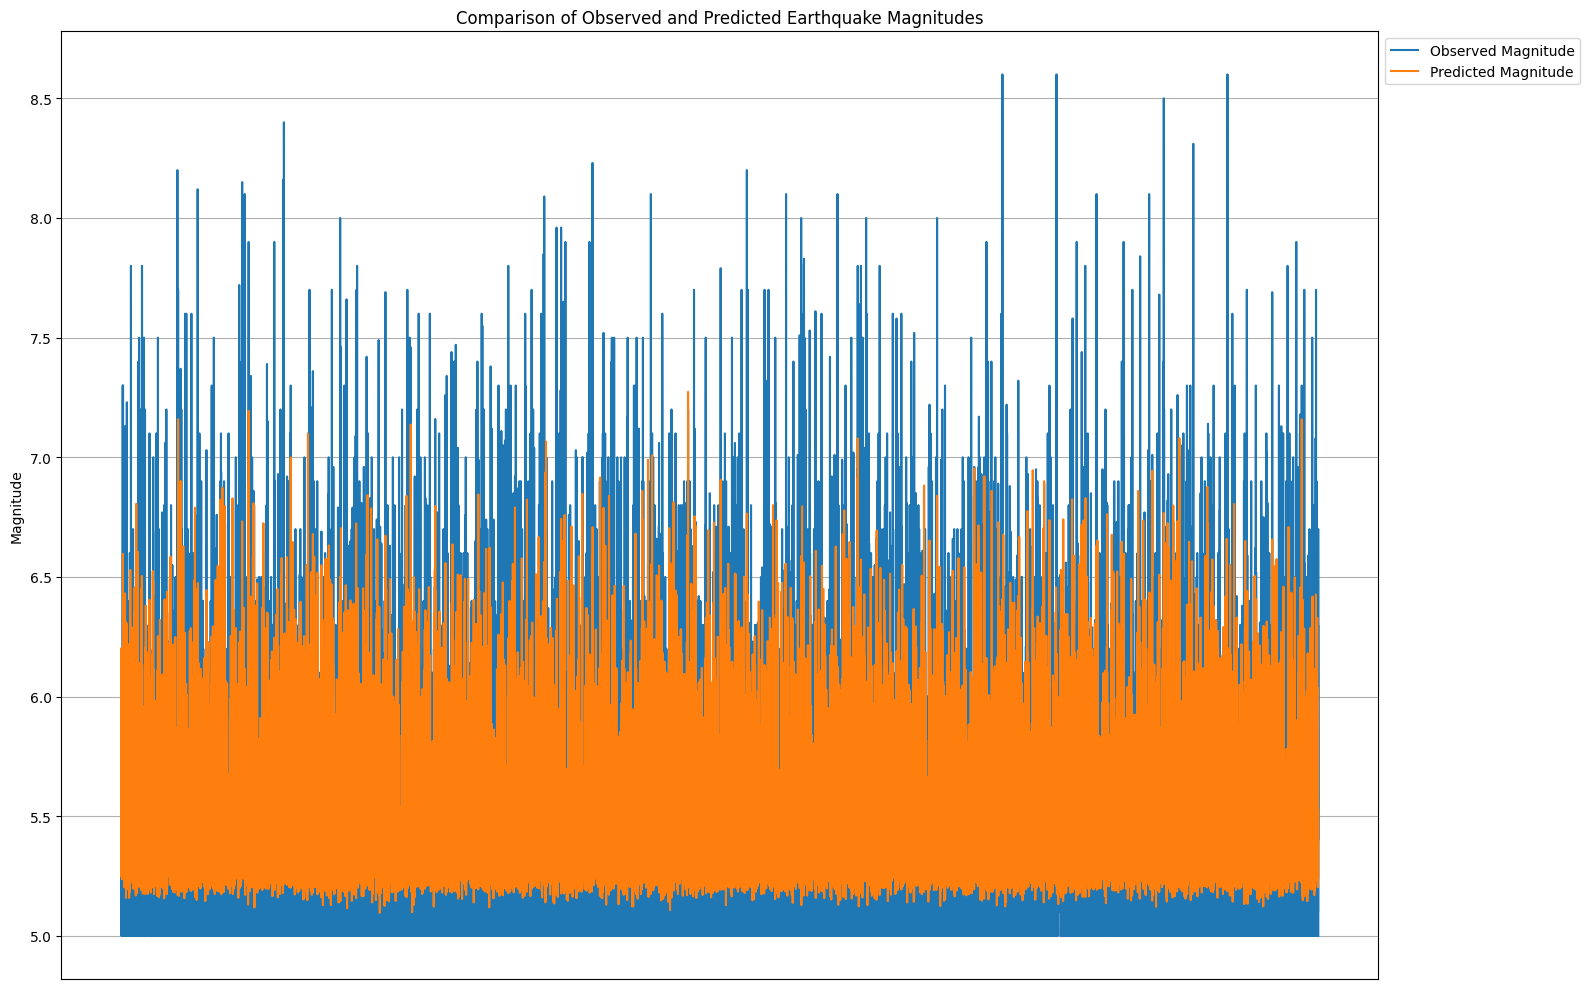

Time Index	Observed Magnitude	Predicted Magnitude
0		6.0			5.268136501312256
1		5.2			5.943482875823975
2		5.3			5.2730793952941895
3		6.03			6.20242166519165
4		5.2			5.484207630157471
5		5.1			5.257823944091797
6		5.1			5.246706008911133
7		5.2			5.533096790313721
8		5.83			5.931340217590332
9		5.0			5.455455780029297
10		5.2			5.421412467956543
11		5.3			5.329315662384033
12		5.0			5.50709342956543
13		5.4			5.309786319732666
14		5.5			5.316136360168457
15		5.4			5.236874580383301
16		5.71			6.075030326843262
17		5.5			5.241652965545654
18		5.0			5.2498369216918945
19		5.0			5.310860633850098
20		5.3			5.239136695861816
21		5.0			5.49247407913208
22		5.7			5.632752895355225
23		5.1			5.470403671264648
24		5.1			5.280450820922852
25		5.4			5.694848537445068
26		5.2			5.333275318145752
27		7.3			5.247331142425537
28		5.4			5.539636135101318
29		5.0			5.246185302734375
30		5.7			5.24807071685791
31		6.56			6.59680700302124
32		7.3			5.606782913208008
33		5.5			5.283323764801025
34		5.1

In [30]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the trained XGBoost model from file
model_filename = "best_xgb_model.pkl"
loaded_model = joblib.load(model_filename)

# Use the loaded model to predict magnitudes on the test set
xgb_test_pred = loaded_model.predict(X_test)

# Create DataFrame containing 'time_original' and predicted magnitudes
predicted_df = pd.DataFrame({'time_original': X_test.index, 'predicted_mag': xgb_test_pred})

# Plot observed and predicted magnitudes against time
plt.figure(figsize=(16, 10))
plt.plot(predicted_df.index, y_test.loc[X_test.index], label='Observed Magnitude') 
plt.plot(predicted_df.index, predicted_df['predicted_mag'], label='Predicted Magnitude')

plt.ylabel('Magnitude')
plt.title('Comparison of Observed and Predicted Earthquake Magnitudes')
plt.legend()
plt.grid(True)

# Remove x-axis labels
plt.xticks([])

# Place legend outside of the plot box
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  
plt.show()

# Print observed and predicted magnitudes along with their time indices
print("Time Index\tObserved Magnitude\tPredicted Magnitude")
for index, row in predicted_df.iterrows():
    print(f"{index}\t\t{y_test.loc[row['time_original']]}\t\t\t{row['predicted_mag']}")

# Convert the time index to datetime
predicted_df.index = pd.to_datetime(predicted_df.index)

# Save the results to a CSV file with the correct date format
predicted_df.to_csv('predicted_magnitudes.csv')


In [41]:
import plotly.graph_objs as go
import plotly.offline as pyo

trace1 = go.Scatter(x=predicted_df.index, y=y_test.loc[X_test.index], mode='lines+markers', name='Observed Magnitude')
trace2 = go.Scatter(x=predicted_df.index, y=predicted_df['predicted_mag'], mode='lines+markers', name='Predicted Magnitude')

layout = go.Layout(title='Comparison of Observed and Predicted Earthquake Magnitudes',
                   xaxis=dict(title='Time'),
                   yaxis=dict(title='Magnitude'))

fig = go.Figure(data=[trace1, trace2], layout=layout)

pyo.plot(fig)


KeyError: "None of [Index([66548, 47685, 63244,  5603, 87413, 77803, 92366, 93247,  1910, 32581,\n       ...\n        5115, 97147, 57379, 51621, 44749, 49784, 96048, 63694, 50910, 33676],\n      dtype='int64', length=20368)] are in the [index]"

# Feature Importance using permutation, shap and mutual information to see importance of each individual feature 

In [ ]:
import shap
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_regression

# Permutation Importance
perm_importance = permutation_importance(best_xgb_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Print permutation importance results
print("Permutation Importance (XGBoost):")
for i in sorted_idx:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]}")

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance (XGBoost)")
plt.show()

# SHAP Values
explainer = shap.Explainer(best_xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Values (XGBoost)")
plt.show()

# Print SHAP values summary
print("SHAP Values (XGBoost):")
shap.summary_plot(shap_values, X_test)

# Mutual Information
mutual_info = mutual_info_regression(X, y)

# Print Mutual Information results
print("Mutual Information (XGBoost):")
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {mutual_info[i]}")

# Plot Mutual Information
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mutual_info)
plt.xlabel("Mutual Information")
plt.title("Mutual Information (XGBoost)")
plt.show()


In [ ]:

# Predict earthquake magnitude and depth for the year 2024

import numpy as np
from xgboost import XGBRegressor
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load the trained XGBoost model
model_filename = "best_xgb_model.pkl"
xgb_model = joblib.load(model_filename)

# Function to predict earthquake magnitude and depth
def predict_earthquakes(data):
    # Make predictions
    predicted_magnitude_depth = xgb_model.predict(data)
    return predicted_magnitude_depth

# Load the new data for the year 2024
new_file_path = 'C:/Users/simon/OneDrive/Skrivbord/Thesis/Significant_Earthquakes.csv'
new_data = pd.read_csv(new_file_path)

# Preprocess the new data
# Retain relevant columns
relevant_columns = ['latitude', 'longitude', 'depth', 'time']

new_data = new_data[relevant_columns]

# Replace missing values with 0
new_data.fillna(0, inplace=True)

# Extract temporal features from 'time' column
new_data['year'] = pd.to_datetime(new_data['time']).dt.year
new_data['month'] = pd.to_datetime(new_data['time']).dt.month

# Drop the 'time' column after feature engineering
new_data.drop('time', axis=1, inplace=True)

# Predict earthquake magnitude and depth for the year 2024
predicted_earthquakes = predict_earthquakes(new_data)

# Create a new figure and axis with Basemap projection
plt.figure(figsize=(10, 6))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to Basemap coordinates
x, y = m(new_data['longitude'].values, new_data['latitude'].values)

# Plot the predicted earthquake occurrences on the map
m.scatter(x, y, c=predicted_earthquakes, cmap='viridis', alpha=0.7)

# Add colorbar and labels
plt.colorbar(label='Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Earthquake Occurrences in 2024')

# Show the plot
plt.show()


In [39]:
# # Predict earthquake magnitude using the trained model
# predicted_magnitude = xgb_model.predict(new_data)

# # Visualize the predicted earthquake magnitudes
# plt.hist(predicted_magnitude, bins=20, color='skyblue', edgecolor='black')
# plt.xlabel('Predicted Magnitude')
# plt.ylabel('Frequency')
# plt.title('Predicted Earthquake Magnitude Distribution for 2024')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Assume 'predicted_depth' contains the predicted depths
predicted_magnitude = xgb_model.predict(new_data)
predicted_depth = xgb_model.predict(new_data)  # Make sure to have the depth predictions

# Create a 2D histogram
plt.figure(figsize=(10, 8))
plt.hist2d(predicted_magnitude, predicted_depth, bins=20, cmap='Blues')

plt.colorbar(label='Counts')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Predicted Depth')
plt.title('Predicted Earthquake Magnitude and Depth Distribution for 2024')
plt.show()


NameError: name 'xgb_model' is not defined